In [5]:
from collections import namedtuple

def f():
    mb = namedtuple('Minibatch', ['img_attrs', 'person_attrs', 'obj_attrs'])
    return mb(img_attrs=[5, 4], person_attrs=['1212', '23', '1234'], obj_attrs=None)

a = f()
b, c, d = a
print(b, c, d)
print(a.img_attrs, a.person_attrs, a.obj_attrs)

# import numpy as np
# from matplotlib import pyplot as plt
# 
# n = 50
# x = np.arange(n + 1)
# y = 1 - 1/np.maximum(1, x)
# 
# plt.plot(x, y)
# plt.grid()
# plt.show()

[5, 4] ['1212', '23', '1234'] None
[5, 4] ['1212', '23', '1234'] None


In [1]:
import json

with open('data/HICO/HAKE/Part_State_76.txt', 'r') as f:
    lines = f.readlines()
part_labels = [l.strip() for l in lines]
part_action_pairs = []
part_action_dict = {}
for l in lines:
    pa_pair = [x.strip() for x in l.split(':')]
    part, action = pa_pair
    part_action_pairs.append(pa_pair)
    part_action_dict.setdefault(part, []).append(action)
actions = sorted({v for vs in part_action_dict.values() for v in vs})
parts = sorted(part_action_dict.keys())

hico_parts_train = json.load(open('data/HICO/HAKE/train.json', 'r'))


In [1]:
import numpy as np
import pickle

embs = pickle.load(open('cache/glove_300_act_norm-avg.pkl', 'rb'))
sim = embs @ embs.T
out = np.array([7, 17, 21, 25, 38, 50])

x, y = np.where(sim - np.eye(sim.shape[0]) >= 0.6)

inds = sorted({i for i, n in enumerate(x) if n not in out} &
              {i for i, n in enumerate(y) if n not in out})
x = x[inds]
y = y[inds]
print(np.stack([x, y], axis=1))
        

[[ 55 108]
 [ 57  71]
 [ 66  67]
 [ 67  66]
 [ 71  57]
 [ 86  87]
 [ 86  93]
 [ 86  97]
 [ 87  86]
 [ 87  93]
 [ 87  94]
 [ 87 101]
 [ 87 103]
 [ 87 109]
 [ 93  86]
 [ 93  87]
 [ 93  94]
 [ 93 101]
 [ 93 103]
 [ 93 109]
 [ 94  87]
 [ 94  93]
 [ 97  86]
 [101  87]
 [101  93]
 [101 103]
 [101 109]
 [103  87]
 [103  93]
 [103 101]
 [103 109]
 [108  55]
 [109  87]
 [109  93]
 [109 101]
 [109 103]]


In [17]:
import numpy as np
import torch
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad)

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] = 2342
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] -= 9
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.]], grad_fn=<PowBackward0>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[   0.,    1.],
        [   4., 2342.],
        [  16.,   25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  0.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  0.],
        [16., 25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])


In [10]:
import numpy as np
import torch
n = 5
x0 = torch.tensor(torch.from_numpy(np.arange(n*2).reshape(n, 2)).float(),requires_grad=True)
a_inds = torch.from_numpy(np.array([0, 3, 4]))
b_inds = torch.from_numpy(np.array([i for i in range(n) if i not in a_inds]))
a = x0[a_inds, :].detach()
b = x0[b_inds, :]
x = torch.cat([a, b], dim=0)[torch.sort(torch.cat([a_inds, b_inds]))[1]]
print((x0 == x).all())
y = x**2
z = y.sum()
z.backward()
print(a.requires_grad, b.requires_grad, x.requires_grad)
print(x0) 
print(x) 
print(y) 
print(y.grad)
print(x.grad)
print(a.grad)
print(b.grad)
print(x0.grad)

tensor(1, dtype=torch.uint8)
False True True
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], requires_grad=True)
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], grad_fn=<TakeBackward>)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.],
        [36., 49.],
        [64., 81.]], grad_fn=<PowBackward0>)
None
None
None
None
tensor([[ 0.,  0.],
        [ 4.,  6.],
        [ 8., 10.],
        [ 0.,  0.],
        [ 0.,  0.]])


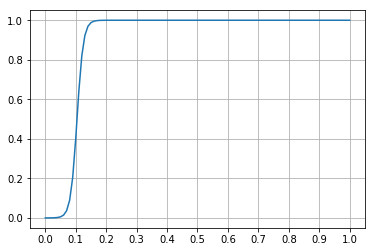

In [21]:
import numpy as np
from matplotlib import pyplot as plt

n = 100
x = np.arange(n + 1) / n

w, k = 96, 10
T = 1 + np.exp(k - w).item()
y = T / (1 + np.exp(-(w * x - k)))

plt.plot(x, y)
plt.gca().set_xticks(np.arange(11) / 10)
plt.grid()
plt.show()


In [1]:
with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
               for l in f.readlines()]
print(inet_categories[0])
print(inet_categories[1])
print(inet_categories[-2])
print(inet_categories[-1])

from lib.detection.wrappers import COCO_CLASSES
print(COCO_CLASSES)

common = set(COCO_CLASSES.values()) & {c for cat in inet_categories for c in cat}
print(len(common))   


['tench', 'Tinca tinca']
['goldfish', 'Carassius auratus']
['ear', 'spike', 'capitulum']
['toilet tissue', 'toilet paper', 'bathroom tissue']
{0: '__background__', 1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'backpack', 26: 'umbrella', 27: 'handbag', 28: 'tie', 29: 'suitcase', 30: 'frisbee', 31: 'skis', 32: 'snowboard', 33: 'sports ball', 34: 'kite', 35: 'baseball bat', 36: 'baseball glove', 37: 'skateboard', 38: 'surfboard', 39: 'tennis racket', 40: 'bottle', 41: 'wine glass', 42: 'cup', 43: 'fork', 44: 'knife', 45: 'spoon', 46: 'bowl', 47: 'banana', 48: 'apple', 49: 'sandwich', 50: 'orange', 51: 'broccoli', 52: 'carrot', 53: 'hot dog', 54: 'pizza', 55: 'donut', 56: 'cake', 57: 'chair', 58: 'couch

In [ ]:
import pickle
import numpy as np
to_filter = [19, 25, 117, 144, 151, 152, 154, 163, 167, 
             190, 245, 258, 307, 326, 347, 366, 400, 
             433, 434, 466, 471, 476, 479, 523, 598]
keep = set(range(600)) - set(to_filter)
d = {'train': {'inter': np.array(sorted(keep))
               }
     }
with open('zero-shot_inds/seen_inds_2.pkl.push', 'wb') as f:
    pickle.dump(d, f)
    

In [14]:
import pickle
import numpy as np
from lib.dataset.hicodet_hake import HicoDetHake

hh = HicoHake()
pacts = {a for p, a in hh.part_actions_pairs}
acts = {a.replace('_', ' ') for a in hh.actions[1:]} | {hh.null_action}
common = sorted((acts & pacts) - {hh.null_action})
pacts_ex = sorted(pacts - acts)
acts_ex = sorted(acts - pacts)

words_in_pacts = {w for a in pacts for w in a.split()}
possible_unseen_acts_inds = np.array([i for i, a in enumerate(hh.actions) 
                                      if a != hh.null_action and a.split('_')[0] not in words_in_pacts])
possible_unseen_acts = [hh.actions[i] for i in possible_unseen_acts_inds]

for i, perc_seen in enumerate([80, 50, 33]):
    num_unseen = min(len(possible_unseen_acts_inds), 
                     (hh.num_actions * (100 - perc_seen)) // 100)
    unseen_acts = np.random.choice(possible_unseen_acts_inds, 
                                   size=num_unseen,
                                   replace=False)
    seen_acts = np.setdiff1d(np.arange(hh.num_actions), unseen_acts)
    print(f'Num seen: {seen_acts.size}')
    d = {'train': {'obj': np.arange(hh.num_objects), 
                   'act': seen_acts
                   }}
    with open(f'zero-shot_inds/seen_inds_{3 + i}.pkl.push', 'wb') as f:
        pickle.dump(d, f)

Num seen: 94
Num seen: 59
Num seen: 39


In [3]:
import pickle
import numpy as np
from lib.dataset.hico import Hico

hico = Hico()
d = {'train': {'obj': np.arange(hico.num_objects), 'act': np.arange(hico.num_actions)}}
with open('zero-shot_inds/seen_inds_6.pkl.push', 'wb') as f:
    pickle.dump(d, f)


In [18]:
import pickle
from lib.dataset.hico import Hico
import numpy as np

hico = Hico()
split = 'train'

fnum = 4
d = pickle.load(open(f'zero-shot_inds/seen_inds_{fnum}.pkl.push', 'rb'))
ainds = d['train']['act']
oinds = d['train']['obj']

labels = hico.split_annotations[split]
act_labels = np.minimum(1, labels @ hico.interaction_to_action_mat)
print(f'{len(set(ainds.tolist()))} / {hico.num_actions} = '
      f'{len(set(ainds.tolist())) / hico.num_actions}')
print(f'{act_labels[:, ainds].sum() / act_labels.sum()}')
print(f'{len(set(oinds.tolist()))} / {hico.num_objects}')



59 / 117 = 0.5042735042735043
0.7447047770881968
80 / 80


In [5]:
import json
d = json.load(open('data/VideoCaptions/train.json', 'r'))
captions = [s for v in d.values() for s in v['sentences']]
print(captions[0])
 

A young woman is seen standing in a room and leads into her dancing.
[1.86528073 1.86528073]


In [9]:
with open('data/VG/Kato/VG_train_1A2B.csv', 'r') as f:
    tr_fns = {l.strip().split(',')[0] for l in f.readlines() if l.strip()}

with open('data/VG/Kato/VG_test.csv', 'r') as f:
    te_fns = {l.strip().split(',')[0] for l in f.readlines() if l.strip()}

print(len(tr_fns))
print(len(te_fns))
print(len(tr_fns | te_fns))

10799
4251
15050


In [5]:
import pickle
from lib.dataset.hico_hake import HicoHakeSplit
from sklearn.metrics import average_precision_score
import numpy as np


with open('zero-shot_inds/seen_inds_1.pkl.push', 'rb') as f:
    d = pickle.load(f)
    
ainds = d['train']['act']
oinds = d['train']['obj']

s = HicoHakeSplit.get_splits(act_inds=ainds, obj_inds=oinds)
ds = s['test']

inds = np.setdiff1d(np.arange(ds.full_dataset.num_interactions), s['train'].active_interactions)
gt_scores = ds.full_dataset.split_annotations[ds._data_split]
gt_scores[gt_scores < 0] = 0

predict_hoi_scores = np.random.rand(*gt_scores.shape)
map = average_precision_score(gt_scores, predict_hoi_scores, average=None)
print(map[inds].mean())

predict_hoi_scores = np.zeros_like(gt_scores)
map = average_precision_score(gt_scores, predict_hoi_scores, average=None)
print(map[inds].mean())


Train objects (80): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Train actions (93): [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86, 88, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115]
Train interactions (474): [0, 1, 2, 4, 5, 6, 9, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 69, 70, 71, 73, 75, 77, 78, 79, 80, 81,

In [38]:
import numpy as np
np.random.seed(10)

a = np.round(np.random.rand(2, 3, 4) * 20).astype(np.int)
# b = (np.random.rand(2, 3) > 0.5)
k = np.round(np.random.rand(2, 3)).astype(np.int)
print(a)
print(k)
print()

all_rows, all_cols = np.mgrid[:a.shape[0], :a.shape[1]]
print(a[all_rows, all_cols, 3 - k])
b = (a[all_rows, all_cols, 3 - k] % 3 == 0)
print(b)
print()

rows, cols = np.where(b)
print(a[rows, cols])
print(k[b])
print(a[rows, cols, 3 - k[b]])
print()

a[rows, cols, 3 - k[b]] = -1
print(a)
print(a.ndim)

[[[15  0 13 15]
  [10  4  4 15]
  [ 3  2 14 19]]

 [[ 0 10 16 12]
  [14  6 18 14]
  [11  3  7 13]]]
[[0 0 1]
 [1 1 1]]

[[15 15 14]
 [16 18  7]]
[[ True  True False]
 [False  True False]]

[[15  0 13 15]
 [10  4  4 15]
 [14  6 18 14]]
[0 0 1]
[15 15 18]

[[[15  0 13 -1]
  [10  4  4 -1]
  [ 3  2 14 19]]

 [[ 0 10 16 12]
  [14  6 -1 14]
  [11  3  7 13]]]
3


In [52]:
import numpy as np

np.random.seed(5)

n = 5
size = 10
h=size 
w=size
boxes = np.stack([np.random.randint(0, w//2, n),
                  np.random.randint(0, h//2, n),
                  np.random.randint(w//2, w, n),
                  np.random.randint(h//2, h, n)], axis=1)
print(boxes)
range_v = np.arange(size).reshape((1, -1))

mask_col = (boxes[:, 0, None] <= range_v) & (range_v < boxes[:, 2, None])
print(mask_col.astype(np.int))
print()

mask_row = (boxes[:, 1, None] <= range_v) & (range_v < boxes[:, 3, None])
print(mask_row.astype(np.int))
print()

mask = mask_col[:, None, :] & mask_row[:, :, None]

if True:
    mask_col = (boxes[:, 0, None] + 1 <= range_v) & (range_v < boxes[:, 2, None] - 1)
    mask_row = (boxes[:, 1, None] + 1 <= range_v) & (range_v < boxes[:, 3, None] - 1)
    mask = mask & ~(mask_col[:, None, :] & mask_row[:, :, None])
patterns = mask.astype(np.int)
print(patterns)

[[3 3 5 9]
 [0 0 8 7]
 [1 0 9 6]
 [0 4 8 6]
 [4 1 6 7]]
[[0 0 0 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 0 0 0 0]]

[[0 0 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 1 1 1 1 1 1 0 0 0]]

[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 1 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[1 1 1 1 1 1 1 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 0 0 0 0 0 0 1 0 0]
  [1 1 1 1 1 1 1 1 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 1 1 1 1 1 1 1 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 1 0]
  [0 1 1 1 1 1 1 1 1 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0

In [1]:
import numpy as np

a = np.random.rand(5, 4)
b = np.random.rand(4, 3)
mm0 = a @ b
mm1 = np.matmul(a, b)
mm2 = (a[:, :, None] * b[None, :, :]).sum(axis=1)
mm3 = (a[..., None] * b[..., None, :, :]).sum(axis=-2)
print(np.allclose(mm0, mm1))
print(np.allclose(mm0, mm2))
print(np.allclose(mm0, mm3))

# Partial
a = np.random.rand(10, 11, 12, 5, 4)
b = np.random.rand(10, 11, 12, 4, 3)
mm0 = a @ b
mm1 = np.matmul(a, b)
mm3 = (a[..., None] * b[..., None, :, :]).sum(axis=-2)
print(np.allclose(mm0, mm1))
print(np.allclose(mm0, mm3))

# Torch
import torch
a = torch.from_numpy(a)
b = torch.from_numpy(b)
mm0 = a @ b
mm1 = torch.matmul(a, b)
mm3 = (a[..., None] * b[..., None, :, :]).sum(dim=-2)
mm4 = torch.bmm(a.view(-1, a.shape[-2], a.shape[-1]),
                b.view(-1, b.shape[-2], b.shape[-1])
                ).view(a.shape[0], a.shape[1], a.shape[2], a.shape[3],
                       b.shape[-1])
print(np.allclose(mm0.cpu().numpy(), mm1.cpu().numpy()))
print(np.allclose(mm0.cpu().numpy(), mm3.cpu().numpy()))
print(np.allclose(mm0.cpu().numpy(), mm4.cpu().numpy()))

True
True
True
True
True
True
True
True


In [5]:
import os
import json

d = json.load(open(os.path.join('data', 'VideoCaptions', 'train.json'), 'r'))
captions = [s.strip(' .') for v in d.values() for s in v['sentences']]
captions[0:10]

['A young woman is seen standing in a room and leads into her dancing',
 'The girl dances around the room while the camera captures her movements',
 'She continues dancing around the room and ends by laying on the floor',
 'The video starts with a title logo sequence',
 'A man and woman are in a living room demonstrating exercises',
 'The woman lays on the ground',
 "The man starts pointing to different areas of the woman's body as she does an exercise",
 'The woman begins to do small sit ups',
 'The woman ends with a final title logo sequence',
 'Two people are seen moving around a kitchen quickly performing various tasks and sitting down']

In [1]:
###############################
# Mapping from COCO-A to Hico #
###############################

from lib.dataset.cocoa import Cocoa
from lib.dataset.hicodet_hake import HicoDetHake
from lib.dataset.word_embeddings import WordEmbeddings
import numpy as np
from analysis.utils import plot_mat

def print_by_highest_sim(sim,  labels_i, maxn=5, exclude_first=True):
    for j, caa in enumerate(ca.actions):
        if j == 0:
            continue
        if exclude_first:
            inds = np.argsort(sim[1:, j])[-maxn:][::-1] + 1
        else:
            inds = np.argsort(sim[:, j])[-maxn:][::-1]
        print(f'{j:3d} {caa:20s}', ', '.join([f'{labels_i[i]} ({sim[i, j] * 100:.1f})' for i in inds]))

In [2]:
ca = Cocoa()
hh = HicoDetHake()
we = WordEmbeddings()

Loading cached glove embeddings.


In [3]:
hhe = we.get_embeddings(hh.actions)
cae = we.get_embeddings(ca.actions)

sims = hhe @ cae.T
sims.shape
print('Similarity by word embeddings.')
# plot_mat(sims, xticklabels=ca.actions, yticklabels=hh.actions, vrange=(0,1), plot=True)
print_by_highest_sim(sims, labels_i=hh.actions)

Default embedding will be used for __no_interaction__.
Default embedding will be used for __no_interaction__.
Similarity by word embeddings.
  1 call                 talk_on (54.4), make (49.5), stop_at (48.4), text_on (45.9), stand_on (45.6)
  2 shout                hug (41.0), kiss (33.9), greet (32.6), throw (31.1), walk (26.7)
  3 signal               light (41.7), sign (37.7), turn (37.2), move (35.9), wave (34.5)
  4 talk                 talk_on (84.7), sit_on (53.2), stand_on (48.0), make (46.4), drink_with (43.9)
  5 whistle              kick (31.5), blow (31.2), stop_at (24.0), break (23.8), train (23.5)
  6 wink                 hug (36.2), kiss (31.7), sip (28.4), lick (23.9), stab (17.6)
  7 avoid                stop_at (45.5), make (43.3), lose (41.4), break (40.6), move (40.3)
  8 bite                 eat (48.1), scratch (37.8), lick (37.4), eat_at (36.9), stab (36.4)
  9 bump                 grind (46.0), drag (32.5), jump (32.5), pick_up (31.7), hug (30.0)
 10 caress    

In [4]:
wndict = hh.driver.wn_action_dict

adict = hh.driver.action_dict

hhsynsets = [sorted({s.replace('_', ' ') for wnid in adict[a]['wn_ids'] for s in wndict[wnid]['syn']}) 
             for a in hh.actions]

# for i in range(hh.num_actions):
#     print(i, hhsynsets[i], we.get_embeddings(hhsynsets[i], del_on_miss=True).shape)

synsims = np.array([[np.mean(we.get_embeddings(hhsynsets[i], del_on_miss=True, verbose=False) @ cae[j, :]) 
                     if i > 0 else 0
                     for i in range(hh.num_actions)] for j in range(ca.num_actions)]
                  ).T

print('Similarity by synset\'s word embeddings.')
print_by_highest_sim(synsims, labels_i=hh.actions)

Similarity by synset's word embeddings.
  1 call                 text_on (51.0), talk_on (48.0), hold (45.1), pick_up (43.5), turn (42.5)
  2 shout                throw (31.1), sit_on (27.9), sit_at (27.9), talk_on (27.4), walk (26.7)
  3 signal               text_on (47.2), turn (37.2), operate (28.8), control (28.8), push (28.2)
  4 talk                 talk_on (78.0), sit_at (45.9), sit_on (45.9), turn (42.9), hold (42.3)
  5 whistle              kick (31.5), blow (31.2), break (23.8), train (23.5), sip (21.4)
  6 wink                 sip (28.4), hug (18.7), scratch (17.2), kiss (16.4), flip (16.1)
  7 avoid                stop_at (43.2), lose (41.4), exit (41.1), break (40.6), turn (39.9)
  8 bite                 eat_at (48.1), eat (48.1), stab (38.9), squeeze (34.5), stick (33.3)
  9 bump                 drag (32.5), pick_up (31.7), jump (28.8), hit (28.6), throw (28.1)
 10 caress               sip (22.7), spin (21.5), hug (21.5), kiss (20.2), wash (17.5)
 11 hit                  

In [5]:
# from lib.dataset.utils import get_obj_mapping

# v_to_h = get_obj_mapping(hh.objects, v_to_h=True)
# hhopera = {j: np.flatnonzero(hh.oa_to_interaction[:, j] >= 0) for j in range(hh.num_actions)}
# caopera = {j: v_to_h[np.flatnonzero(ca.oa_to_interaction[:, j] >= 0)] for j in range(ca.num_actions)}

# jaccard = np.array([[np.intersect1d(hhopera[i], caopera[j]).size / np.union1d(hhopera[i], caopera[j]).size
#                      for j in range(ca.num_actions)] for i in range(hh.num_actions)]
#                   )

# # plot_mat(jaccard, xticklabels=ca.actions, yticklabels=hh.actions, vrange=(0,1), plot=True)
# print('Similarity by Jaccard index over affordable objects.')
# print_by_highest_sim(jaccard, labels_i=hh.actions)

In [6]:
# for j, caa in enumerate(ca.actions):
#     if j == 0:
#         continue
#     print(f'{j:3d} {caa:20s}', ', '.join([f'{hh.objects[i]}' for i in caopera[j]]))

In [7]:
# pe = we.get_embeddings(hh.symparts)
# psims = pe @ cae.T
#
# # Useless
# print_by_highest_sim(psims,labels_i=hh.symparts, maxn=hh.num_symparts)

In [8]:
# print_by_highest_sim(jaccard * sims, labels_i=hh.actions)

In [16]:
assignment = {}
for j in range(1, ca.num_actions):
    caa = ca.actions[j]
    
    wem_s = sims[:, j]
    syn_s = synsims[:, j]
#     jac_s = jaccard[:, j]
    
    wem_best = np.argmax(wem_s[1:]) + 1
    if hh.actions[wem_best] == caa:  # same action
        assignment[j] = wem_best
        print(f'{j:3d} {caa} was assigned {hh.actions[wem_best]}.')
        continue
    
    sem_s = (wem_s + syn_s) / 2
    sem_rank = np.argsort(sem_s[1:])[-5:][::-1] + 1
    best_sem_s = sem_s[sem_rank]
    r = best_sem_s / best_sem_s.min()  # ratio
    neg_entropy = np.sum(r * np.log2(r))
    assigned = (best_sem_s[0] >= 0.4)
    print(f'{j:3d} {caa:20s} {"x" if assigned else "":1s} {neg_entropy:.2f} ', 
          ', '.join([f'{hh.actions[i]} ({sem_s[i] * 100:.1f})' for i in sem_rank]))

  1 call                 x 0.51  talk_on (51.2), text_on (48.4), stop_at (45.2), stand_on (44.0), pick_up (43.5)
  2 shout                  0.69  throw (31.1), hug (29.5), walk (26.7), read (25.6), sit_at (25.4)
  3 signal                 1.04  text_on (38.8), turn (37.2), light (33.8), sign (30.6), control (30.2)
  4 talk                 x 2.10  talk_on (81.3), sit_on (49.6), sit_at (44.5), stand_on (44.4), turn (42.9)
  5 whistle                1.44  kick (31.5), blow (31.2), break (23.8), train (23.5), stop_at (22.6)
  6 wink                   4.06  sip (28.4), hug (27.5), kiss (24.1), lick (17.8), scratch (15.8)
  7 avoid                x 0.26  stop_at (44.3), lose (41.4), break (40.6), make (40.0), turn (39.9)
  8 bite                 x 1.21  eat (48.1), eat_at (42.5), stab (37.6), scratch (35.2), squeeze (34.5)
  9 bump                   0.90  grind (35.9), drag (32.5), pick_up (31.7), jump (30.6), hit (28.6)
 10 caress                 3.72  hug (30.8), kiss (25.7), sip (22.7), l

In [10]:
from ax.service.ax_client import AxClient
import numpy as np

ax_client = AxClient()
ax_client.create_experiment(
    name="test_experiment",
    parameters=[
        {
            "name": "x1",
            "type": "range",
            "bounds": [-5.0, 10.0],
            "value_type": "float",
        },
        {
            "name": "x2",
            "type": "range",
            "bounds": [0.0, 10.0],
        },
    ],
    objective_name="obj",
    minimize=True,
)

def f(hyperparameters):
    x1 = hyperparameters['x1']
    x2 = hyperparameters['x2']
    a = np.random.rand()
    b = np.random.randint(-1, 2)
    v = a * x1 + (1-a) * b * x2
    print(f'{x1:8.3f} {x2:8.3f} {a:8.3f} {b:4d} {v:8.3f}')
    return v
    
for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    v = f(parameters)
    ax_client.complete_trial(trial_index=trial_index, raw_data=v)

best_parameters, metrics = ax_client.get_best_parameters()
print(best_parameters)
print(metrics)

[INFO 05-21 12:54:29] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.
[INFO 05-21 12:54:29] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 05-21 12:54:29] ax.service.ax_client: Generated new trial 0 with parameters {'x1': -1.82, 'x2': 4.77}.
[INFO 05-21 12:54:29] ax.service.ax_client: Completed trial 0 with data: {'obj': (-0.81, None)}.
[INFO 05-21 12:54:29] ax.service.ax_client: Generated new trial 1 with parameters {'x1': 2.8, 'x2': 4.18}.
[INFO 05-21 12:54:29] ax.service.ax_client: Completed trial 1 with data: {'obj': (-1.76, None)}.
[INFO 05-21 12:54:29] ax.service.ax_client: Generated new trial 2 with parameters {'x1': 6.33, 'x2'

  -1.820    4.765    0.444    0   -0.808
   2.805    4.181    0.346   -1   -1.763
   6.327    9.178    0.582   -1   -0.157
  -4.591    7.210    0.036    0   -0.164
   6.887    0.587    0.617   -1    4.024


[INFO 05-21 12:54:29] ax.service.ax_client: Generated new trial 5 with parameters {'x1': 2.95, 'x2': 6.04}.
[INFO 05-21 12:54:29] ax.service.ax_client: Completed trial 5 with data: {'obj': (5.8, None)}.


   2.952    6.036    0.077    1    5.800


[INFO 05-21 12:54:30] ax.service.ax_client: Generated new trial 6 with parameters {'x1': -4.73, 'x2': 2.33}.
[INFO 05-21 12:54:30] ax.service.ax_client: Completed trial 6 with data: {'obj': (-3.41, None)}.


  -4.731    2.329    0.721    0   -3.410


[INFO 05-21 12:54:30] ax.service.ax_client: Generated new trial 7 with parameters {'x1': -0.93, 'x2': 2.82}.
[INFO 05-21 12:54:30] ax.service.ax_client: Completed trial 7 with data: {'obj': (-0.29, None)}.


  -0.931    2.815    0.310    0   -0.288


[INFO 05-21 12:54:31] ax.service.ax_client: Generated new trial 8 with parameters {'x1': -5.0, 'x2': 0.0}.
[INFO 05-21 12:54:31] ax.service.ax_client: Completed trial 8 with data: {'obj': (-2.36, None)}.


  -5.000    0.000    0.472   -1   -2.360


[INFO 05-21 12:54:31] ax.service.ax_client: Generated new trial 9 with parameters {'x1': -1.41, 'x2': 0.0}.
[INFO 05-21 12:54:31] ax.service.ax_client: Completed trial 9 with data: {'obj': (-0.14, None)}.


  -1.413    0.000    0.101   -1   -0.142


[INFO 05-21 12:54:32] ax.service.ax_client: Generated new trial 10 with parameters {'x1': -5.0, 'x2': 4.13}.
[INFO 05-21 12:54:32] ax.service.ax_client: Completed trial 10 with data: {'obj': (-2.96, None)}.


  -5.000    4.127    0.592    0   -2.959


[INFO 05-21 12:54:32] ax.service.ax_client: Generated new trial 11 with parameters {'x1': 10.0, 'x2': 10.0}.
[INFO 05-21 12:54:32] ax.service.ax_client: Completed trial 11 with data: {'obj': (3.75, None)}.


  10.000   10.000    0.375    0    3.749


[INFO 05-21 12:54:33] ax.service.ax_client: Generated new trial 12 with parameters {'x1': -5.0, 'x2': 10.0}.
[INFO 05-21 12:54:33] ax.service.ax_client: Completed trial 12 with data: {'obj': (-0.49, None)}.


  -5.000   10.000    0.098    0   -0.492


[INFO 05-21 12:54:34] ax.service.ax_client: Generated new trial 13 with parameters {'x1': -5.0, 'x2': 1.5}.
[INFO 05-21 12:54:34] ax.service.ax_client: Completed trial 13 with data: {'obj': (-1.61, None)}.


  -5.000    1.497    0.323    0   -1.614


[INFO 05-21 12:54:34] ax.service.ax_client: Generated new trial 14 with parameters {'x1': -3.19, 'x2': 1.85}.
[INFO 05-21 12:54:34] ax.service.ax_client: Completed trial 14 with data: {'obj': (-1.35, None)}.


  -3.190    1.852    0.422    0   -1.347
{'x1': -4.731228103753359, 'x2': 2.3290876227256465}
({'obj': -2.030394736512454}, {'obj': {'obj': 0.9745157913529622}})
